In [1]:
import pandas as pd
import numpy as np

In [2]:

df= pd.read_csv('fb_news_posts_20K.csv')
df.head()

,created_time,description,link,message,page_id,post_id,react_angry,react_haha,react_like,react_love,react_sad,react_wow,scrape_time,shares
0,2017-07-14T14:30:59+0000,NaN,https://www.facebook.com/bbcnews/videos/101548...,We are #LIVE outside the National Rifle Associ...,228735667216,228735667216_10154890879532217,54,24,993,144,12,24,2017-07-14 11:01:24.379857,139
1,2017-07-14T14:20:59+0000,,http://bbc.in/2talMsx,UPDATE: \r\n-2 Ukrainian tourists killed in st...,228735667216,228735667216_10154890968202217,172,8,994,11,783,264,2017-07-14 11:01:24.379857,680
2,2017-07-14T13:40:38+0000,NaN,https://www.facebook.com/bbcnews/videos/101548...,Proms: Come with us on a tour of the Royal Alb...,228735667216,228735667216_10154890852247217,5,12,2034,369,6,45,2017-07-14 11:01:24.379857,395
3,2017-07-14T12:55:45+0000,NaN,https://www.facebook.com/bbcnews/videos/142678...,Thousands say their final goodbyes to Bradley ...,228735667216,228735667216_1426789250735491,6,0,2262,754,1989,11,2017-07-14 11:01:24.379857,542
4,2017-07-14T12:45:00+0000,NaN,https://www.facebook.com/bbcnews/videos/101548...,"Despite safety warnings, this beach near an ai...",228735667216,228735667216_10154890645702217,65,513,4336,54,128,815,2017-07-14 11:01:24.379857,1956


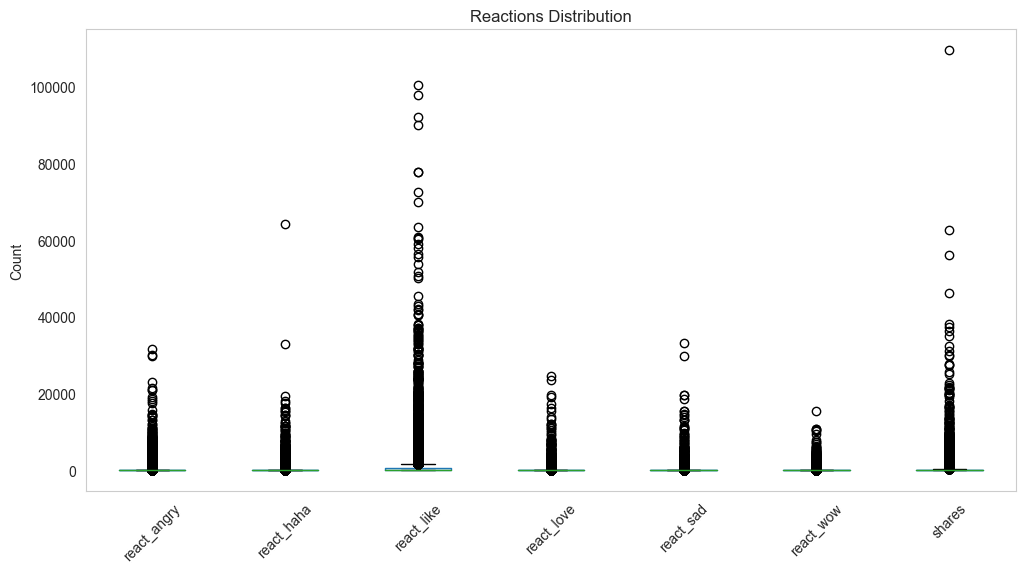

Potential Outliers:


,react_angry,react_haha,react_like,react_love,react_sad,react_wow,shares
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1989.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
19845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19846,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19848,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
import pandas as pd
import matplotlib.pyplot as plt

numerical_cols = ['react_angry', 'react_haha', 'react_like', 'react_love', 'react_sad', 'react_wow', 'shares']
numerical_data = df[numerical_cols]

# Plot boxplots for each reaction type
plt.figure(figsize=(12, 6))
numerical_data.boxplot(column=numerical_cols, grid=False)
plt.title('Reactions Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Calculate potential outliers
outliers = numerical_data[(numerical_data > 3 * numerical_data.std())]

# Print potential outliers
print("Potential Outliers:")
outliers

TIME SERIES ANALYSIS


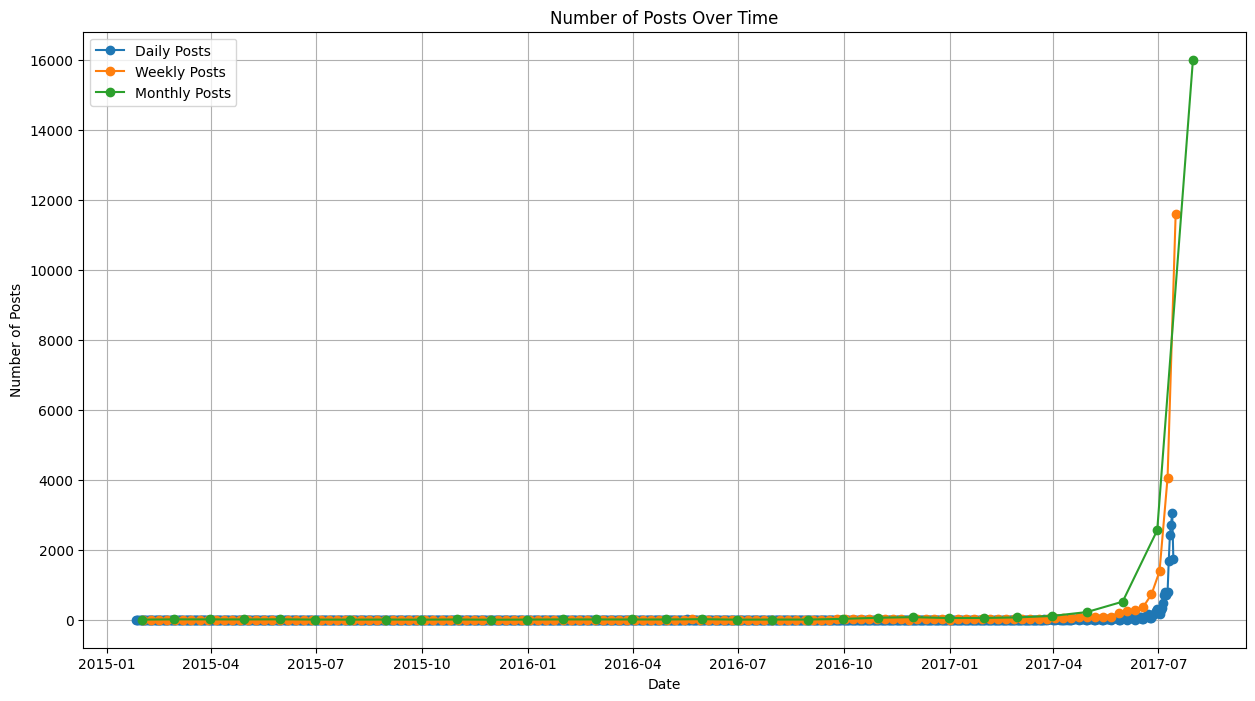

Peak Posting Times:
Peak Daily: 2017-07-13
Peak Weekly: 2017-07-16
Peak Monthly: 2017-07


In [6]:
df=df1
df['created_time'] = pd.to_datetime(df['created_time'])
df['scrape_time'] = pd.to_datetime(df['scrape_time'])

# Set 'created_time' as the index for time series analysis
df.set_index('created_time', inplace=True)

# Resample data to daily, weekly, and monthly frequencies
daily_posts = df.resample('D').size()
weekly_posts = df.resample('W').size()
monthly_posts = df.resample('M').size()

# Plot the number of posts per day, week, and month
plt.figure(figsize=(15, 8))
plt.plot(daily_posts, label='Daily Posts', marker='o')
plt.plot(weekly_posts, label='Weekly Posts', marker='o')
plt.plot(monthly_posts, label='Monthly Posts', marker='o')
plt.title('Number of Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.legend()
plt.grid(True)
plt.show()

# Identify peak posting times
peak_daily = daily_posts.idxmax().strftime('%Y-%m-%d')
peak_weekly = weekly_posts.idxmax().strftime('%Y-%m-%d')
peak_monthly = monthly_posts.idxmax().strftime('%Y-%m')

print("Peak Posting Times:")
print(f"Peak Daily: {peak_daily}")
print(f"Peak Weekly: {peak_weekly}")
print(f"Peak Monthly: {peak_monthly}")

In [10]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('fb_news_posts_20K.csv')

# Select only the numerical columns
numerical_cols = ['react_angry', 'react_haha', 'react_like', 'react_love', 'react_sad', 'react_wow', 'shares']

# Calculate the median for each numerical column
median_values = df[numerical_cols].median()

# Replace outliers with the median value for each column
for col in numerical_cols:
    median_val = median_values[col]
    std_val = df[col].std()
    outlier_threshold = 3 * std_val  # define outlier threshold
    
    # Replace outliers with median value
    df[col] = df[col].apply(lambda x: median_val if abs(x - median_val) > outlier_threshold else x)

# Now, df contains numerical columns with outliers replaced by the median value


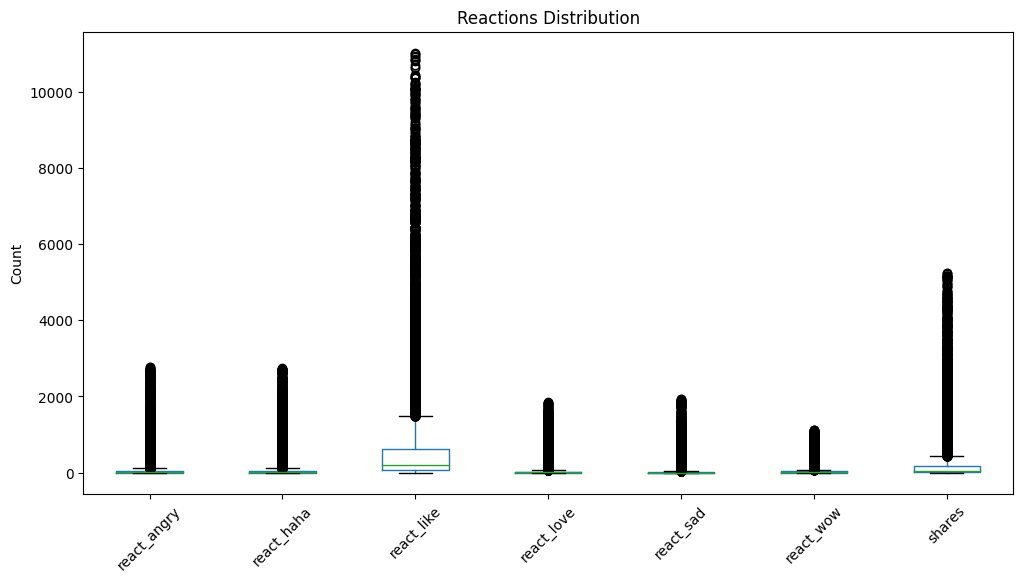

Potential Outliers:


,react_angry,react_haha,react_like,react_love,react_sad,react_wow,shares
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,783.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,754.0,NaN,NaN,NaN
4,NaN,NaN,4336.0,NaN,NaN,815.0,1956.0
...,...,...,...,...,...,...,...
19845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19846,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19848,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

numerical_cols = ['react_angry', 'react_haha', 'react_like', 'react_love', 'react_sad', 'react_wow', 'shares']
numerical_data = df[numerical_cols]

# Plot boxplots for each reaction type
plt.figure(figsize=(12, 6))
numerical_data.boxplot(column=numerical_cols, grid=False)
plt.title('Reactions Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Calculate potential outliers
outliers = numerical_data[(numerical_data > 3 * numerical_data.std())]

# Print potential outliers
print("Potential Outliers:")
outliers

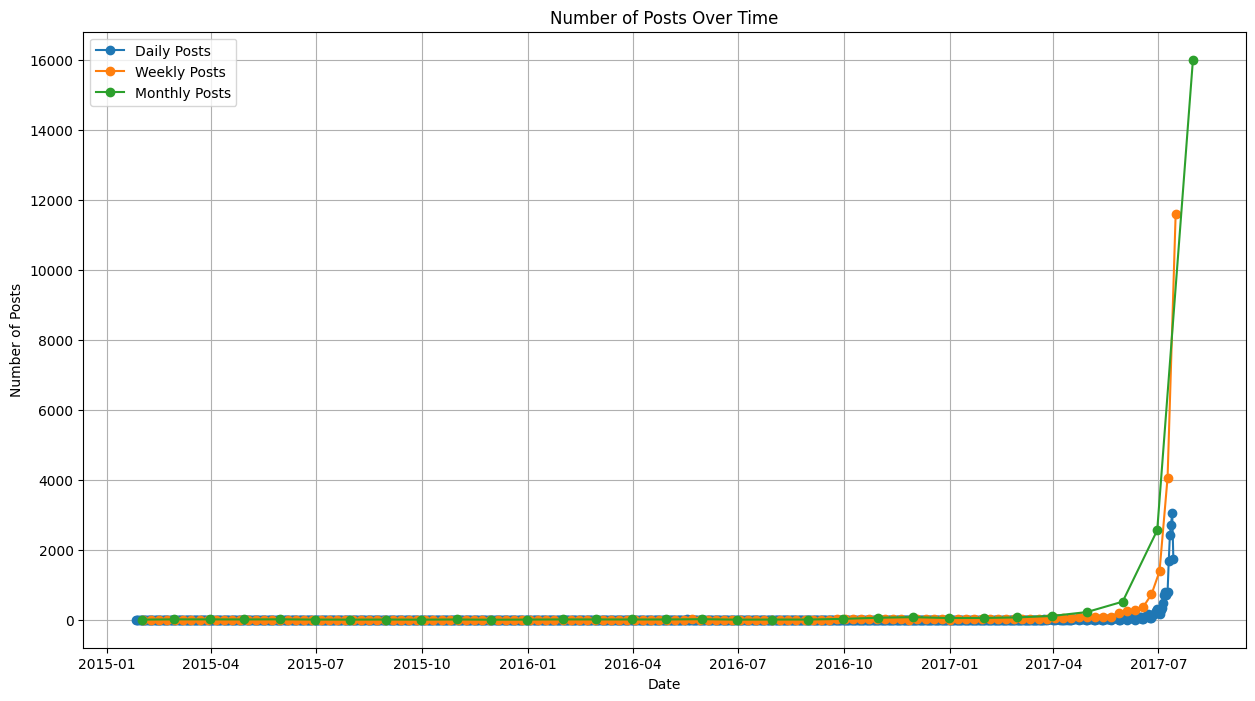

Peak Posting Times:
Peak Daily: 2017-07-13
Peak Weekly: 2017-07-16
Peak Monthly: 2017-07


In [11]:

df['created_time'] = pd.to_datetime(df['created_time'])
df['scrape_time'] = pd.to_datetime(df['scrape_time'])

# Set 'created_time' as the index for time series analysis
df.set_index('created_time', inplace=True)

# Resample data to daily, weekly, and monthly frequencies
daily_posts = df.resample('D').size()
weekly_posts = df.resample('W').size()
monthly_posts = df.resample('M').size()

# Plot the number of posts per day, week, and month
plt.figure(figsize=(15, 8))
plt.plot(daily_posts, label='Daily Posts', marker='o')
plt.plot(weekly_posts, label='Weekly Posts', marker='o')
plt.plot(monthly_posts, label='Monthly Posts', marker='o')
plt.title('Number of Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.legend()
plt.grid(True)
plt.show()

# Identify peak posting times
peak_daily = daily_posts.idxmax().strftime('%Y-%m-%d')
peak_weekly = weekly_posts.idxmax().strftime('%Y-%m-%d')
peak_monthly = monthly_posts.idxmax().strftime('%Y-%m')

print("Peak Posting Times:")
print(f"Peak Daily: {peak_daily}")
print(f"Peak Weekly: {peak_weekly}")
print(f"Peak Monthly: {peak_monthly}")

In [12]:
df['total_reactions'] = df[['react_angry', 'react_haha', 'react_like', 'react_love', 'react_sad', 'react_wow']].sum(axis=1)

# Analyze the distribution of reactions for different types of posts
reaction_columns = ['react_angry', 'react_haha', 'react_like', 'react_love', 'react_sad', 'react_wow']
reaction_distribution = df[reaction_columns].sum()

# Investigate the correlation between reactions and shares
correlation_matrix = df[['react_angry', 'react_haha', 'react_like', 'react_love', 'react_sad', 'react_wow', 'shares']].corr()

# Print the results
print("Total Number of Reactions for Each Post:")
print(df[['post_id', 'total_reactions']])

print("\nDistribution of Reactions for Different Types of Posts:")
print(reaction_distribution)

print("\nCorrelation Matrix between Reactions and Shares:")
print(correlation_matrix)

Total Number of Reactions for Each Post:
                                                  post_id  total_reactions
created_time                                                              
2017-07-14 14:30:59+00:00  228735667216_10154890879532217           1251.0
2017-07-14 14:20:59+00:00  228735667216_10154890968202217           2232.0
2017-07-14 13:40:38+00:00  228735667216_10154890852247217           2471.0
2017-07-14 12:55:45+00:00   228735667216_1426789250735491           3036.0
2017-07-14 12:45:00+00:00  228735667216_10154890645702217           5911.0
...                                                   ...              ...
2017-07-07 23:30:00+00:00   38925837299_10155557438782300            146.0
2017-07-07 23:00:00+00:00   38925837299_10155557374762300             37.0
2017-07-07 22:30:00+00:00   38925837299_10155557342647300             30.0
2017-07-07 22:00:00+00:00   38925837299_10155557288502300             20.0
2017-07-07 21:30:00+00:00   38925837299_10155556128547300  

grouping by page id


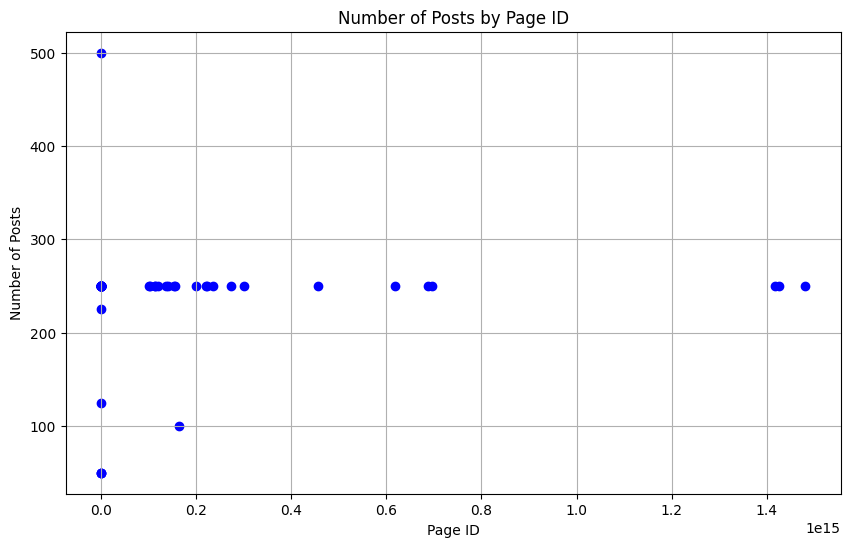

In [14]:
posts_per_page = df.groupby('page_id').size().reset_index(name='num_posts')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(posts_per_page['page_id'], posts_per_page['num_posts'], color='blue')
plt.title('Number of Posts by Page ID')
plt.xlabel('Page ID')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()

In [15]:
df['total_reactions'] = df[['react_angry', 'react_haha', 'react_like', 'react_love', 'react_sad', 'react_wow']].sum(axis=1)

# Group by page ID and sum the total reactions for each page
page_reactions = df.groupby('page_id')['total_reactions'].sum().reset_index(name='total_reactions')

# Sort pages based on total reactions in descending order
most_viral_pages = page_reactions.sort_values(by='total_reactions', ascending=False)

# Print the most viral pages
print("Most Viral Pages (Top 10):")
print(most_viral_pages.head(10))

Most Viral Pages (Top 10):
             page_id  total_reactions
30       25987609066        1390264.0
64   136264019722601        1117047.0
54      228735667216         967408.0
39       62507427296         964080.0
45       95475020353         927847.0
23       15704546335         926368.0
1         5550296508         784140.0
12        7642602143         571831.0
80  1425464424382692         552547.0
27       20324257234         526180.0


In [18]:
df['total_reactions'] = df[['react_angry', 'react_haha', 'react_like', 'react_love', 'react_sad', 'react_wow']].sum(axis=1)

# Group by user and calculate the total number of reactions for each user's posts
total_reactions_per_user = df.groupby('page_id')['total_reactions'].sum().reset_index(name='total_reactions')

# Identify the top 20 pages with the highest total number of reactions
top_20_pages = total_reactions_per_user.nlargest(20, 'total_reactions')

# Display the top 20 pages
print("Top 20 Most Viral Pages:")
print(top_20_pages)

# Save the top 20 pages in a list
top_20_pages_list = top_20_pages['page_id'].tolist()

Top 20 Most Viral Pages:
             page_id  total_reactions
30       25987609066        1390264.0
64   136264019722601        1117047.0
54      228735667216         967408.0
39       62507427296         964080.0
45       95475020353         927847.0
23       15704546335         926368.0
1         5550296508         784140.0
12        7642602143         571831.0
80  1425464424382692         552547.0
27       20324257234         526180.0
26       18468761129         503019.0
0         5281959998         481629.0
18       10643211755         471691.0
10        7533944086         446778.0
21       13652355666         432392.0
37       60894670532         410622.0
43       86680728811         379951.0
36       43179984254         362155.0
67   155869377766434         347118.0
6         6250307292         327418.0


In [19]:
df['total_reactions'] = df[['react_angry', 'react_haha', 'react_like', 'react_love', 'react_sad', 'react_wow']].sum(axis=1)

# Group by user and calculate the total number of reactions for each user's posts
total_reactions_per_user = df.groupby('page_id')['total_reactions'].sum().reset_index(name='total_reactions')

# Identify the top 20 pages with the highest total number of reactions
top_20_pages = total_reactions_per_user.nlargest(20, 'total_reactions')

# Filter the dataset to include only the posts from the top 20 users
top_20_df = df[df['page_id'].isin(top_20_pages['page_id'])]

# Group the filtered dataset by post ID and sum up the reactions for each post
grouped_data = top_20_df.groupby('post_id')[['react_angry', 'react_haha', 'react_like', 'react_love', 'react_sad', 'react_wow']].sum()

# Plot the grouped bar chart
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', stacked=False)
plt.title('Reactions for Top 20 Users\' Posts')
plt.xlabel('Post ID')
plt.ylabel('Number of Reactions')
plt.xticks(rotation=45)
plt.legend(title='Reaction Type')
plt.grid(axis='y')
plt.show()

<Figure size 1200x800 with 0 Axes>

c:\Users\JUMBO\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

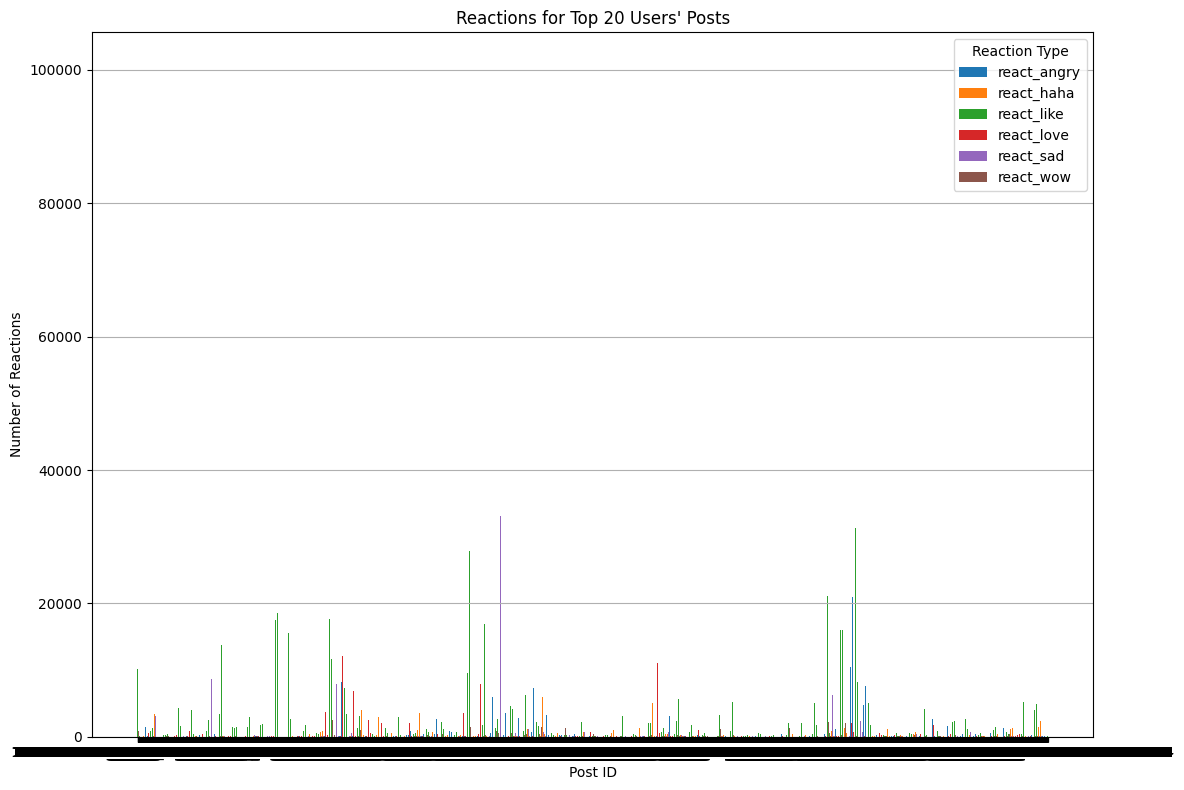

In [24]:
df['total_reactions'] = df[['react_angry', 'react_haha', 'react_like', 'react_love', 'react_sad', 'react_wow']].sum(axis=1)

# Group by user and calculate the total number of reactions for each user's posts
total_reactions_per_user = df.groupby('page_id')['total_reactions'].sum().reset_index(name='total_reactions')

# Identify the top 20 pages with the highest total number of reactions
top_20_pages = total_reactions_per_user.nlargest(20, 'total_reactions')

# Filter the dataset to include only the posts from the top 20 users
top_20_df = df[df['page_id'].isin(top_20_pages['page_id'])]

# Group the filtered dataset by post ID and sum up the reactions for each post
grouped_data = top_20_df.groupby('post_id')[['react_angry', 'react_haha', 'react_like', 'react_love', 'react_sad', 'react_wow']].sum()

# Plot the grouped bar chart
plt.figure(figsize=(12, 8))

# Define bar width and positions
bar_width = 0.15
index = np.arange(len(grouped_data))

# Plot bars for each reaction type
for i, col in enumerate(grouped_data.columns):
    plt.bar(index + i * bar_width, grouped_data[col], bar_width, label=col)

plt.title('Reactions for Top 20 Users\' Posts')
plt.xlabel('Post ID')
plt.ylabel('Number of Reactions')
plt.xticks(index + bar_width * (len(grouped_data.columns) - 1) / 2, grouped_data.index)
plt.legend(title='Reaction Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

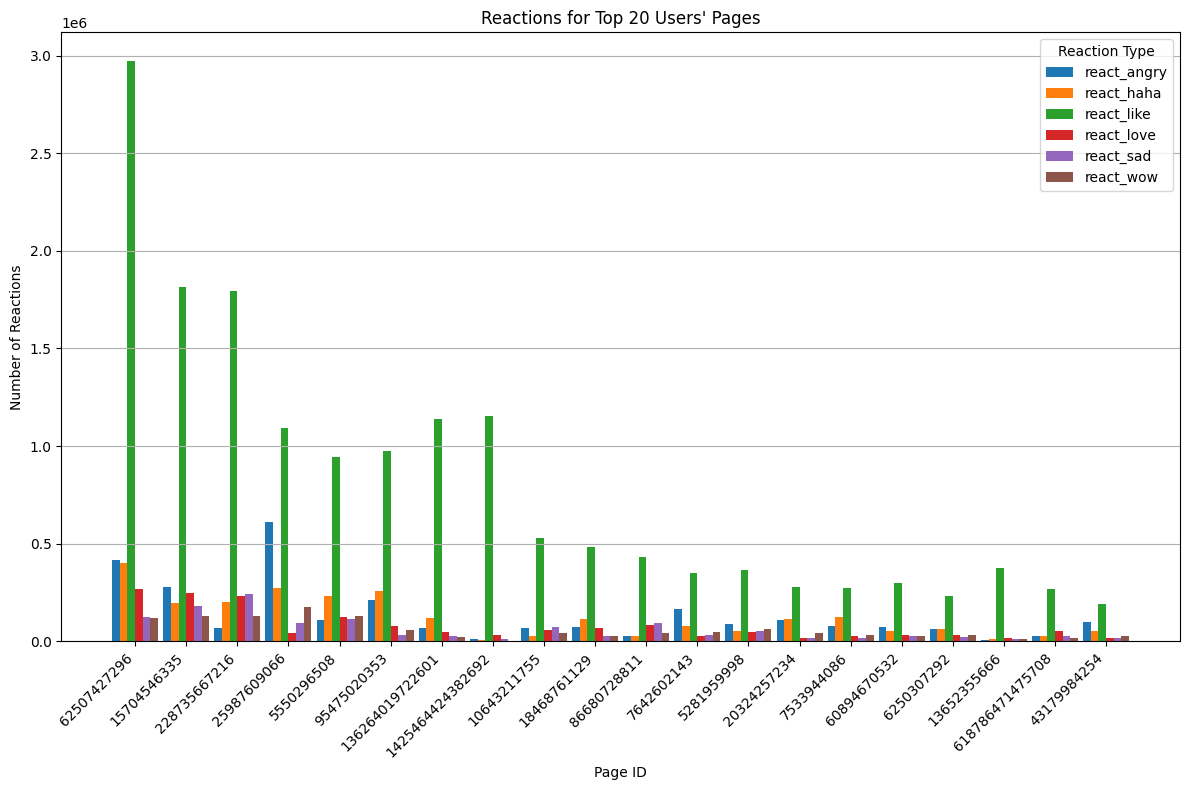

In [28]:
grouped_data = df.groupby('page_id')[['react_angry', 'react_haha', 'react_like', 'react_love', 'react_sad', 'react_wow']].sum()

# Find the top 20 users based on the sum of reactions
top_20_pages = grouped_data.sum(axis=1).nlargest(20).index

# Filter the DataFrame to include only the top 20 users
top_20_data = grouped_data.loc[top_20_pages]

# Plot the grouped bar graph
plt.figure(figsize=(12, 8))

# Define bar width and positions
bar_width = 0.15
index = np.arange(len(top_20_data))

# Plot bars for each reaction type
for i, col in enumerate(top_20_data.columns):
    plt.bar(index + i * bar_width, top_20_data[col], bar_width, label=col)

plt.title('Reactions for Top 20 Users\' Pages')
plt.xlabel('Page ID')
plt.ylabel('Number of Reactions')
plt.xticks(index + bar_width * (len(top_20_data.columns) - 1) / 2, top_20_data.index, rotation=45, ha='right')
plt.legend(title='Reaction Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

TEXT AND MESSAGE PREPROCESSING

In [11]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string

# Combine message and link columns into a single text column
df['text'] = df['message'].fillna('') + ' ' + df['link'].fillna('')

# Function to preprocess text
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

# Apply preprocessing to the text column
df['tokens'] = df['text'].apply(preprocess_text)

# Flatten list of tokens
all_tokens = [token for sublist in df['tokens'] for token in sublist]

# Calculate frequency distribution
fdist = FreqDist(all_tokens)

# Print the most common words
print("Most Common Words:")
print(fdist.most_common(20))


Most Common Words:
[('trump', 3528), ('’', 3045), ('president', 2106), ('donald', 1578), ('“', 1481), ('”', 1411), ('us', 1244), ('new', 1038), ('one', 968), ('said', 962), ('russian', 796), ('people', 783), ('watch', 690), ('would', 683), ('house', 630), ('first', 627), ('meeting', 626), ('trumps', 617), ('news', 609), ('says', 577)]


In [3]:
pip install wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 300.2/300.2 kB 9.4 MB/s eta 0:00:00


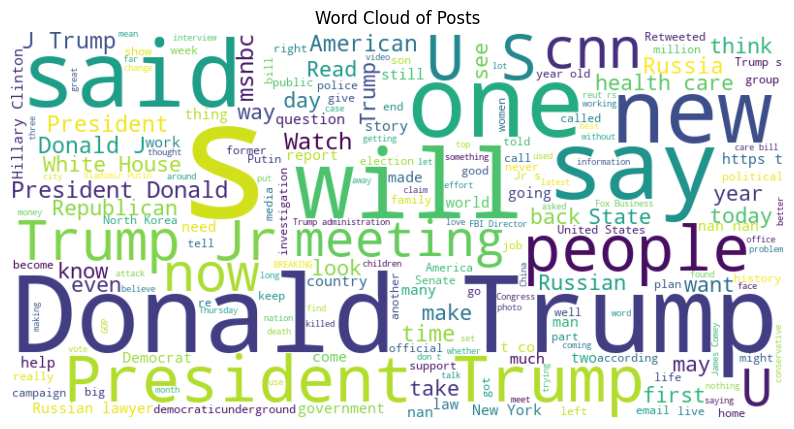

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all messages and links into a single string
text = ' '.join(df['message'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Posts')
plt.axis('off')
plt.show()


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# Define a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Create a K-means clustering pipeline
pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('kmeans', KMeans(n_clusters=5))  # Adjust the number of clusters as needed
])

# Fit the pipeline to the text data
pipeline.fit(df['message'].astype(str))

# Get the cluster labels
cluster_labels = pipeline.named_steps['kmeans'].labels_

# Add cluster labels to the DataFrame
df['cluster'] = cluster_labels

# Print the number of posts in each cluster
print("Number of Posts in Each Cluster:")
print(df['cluster'].value_counts())

# Analyze the clusters further, for example, by examining common words in each cluster
for cluster_id in range(5):  # Assuming 5 clusters
    cluster_posts = df[df['cluster'] == cluster_id]['text']
    cluster_text = ' '.join(cluster_posts.astype(str))
    print(f"\nCluster {cluster_id} Most Common Words:")
    print(WordCloud().generate(cluster_text))


c:\Users\JUMBO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of Posts in Each Cluster:
4    15654
1     2587
2      729
3      662
0      218
Name: cluster, dtype: int64

Cluster 0 Most Common Words:

Cluster 1 Most Common Words:

Cluster 2 Most Common Words:

Cluster 3 Most Common Words:

Cluster 4 Most Common Words:


c:\Users\JUMBO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Cluster 0 Texts:
1. The two brands will remain separate. "You will not be seeing 'Blue Man Group by Cirque du Soleil.'"
2. The Emmys got it mostly right!
3. Call it “Guaranteed lifetime coverage for all.”
4. Nearly half the states have refused to comply with a request to hand over substantial amounts of confidential and sensitive voter data.
5. The Democrat Party's become the largest hate group in this country.

Cluster 1 Texts:
1. President Donald J. Trump's suggestion that he would work with Russia was met with widespread skepticism.
2. Democratic Rep. Gerry Connolly demanded that Vice President Mike Pence shut down President Trump's voter fraud commission's request for states to share private voter registration data, saying that it is "based on false claims made by President Trump and members of his administration."
3. Former late-night television show host David Letterman says that people need to “stop whining” about President Donald J. Trump and instead “figure out a way” to remo

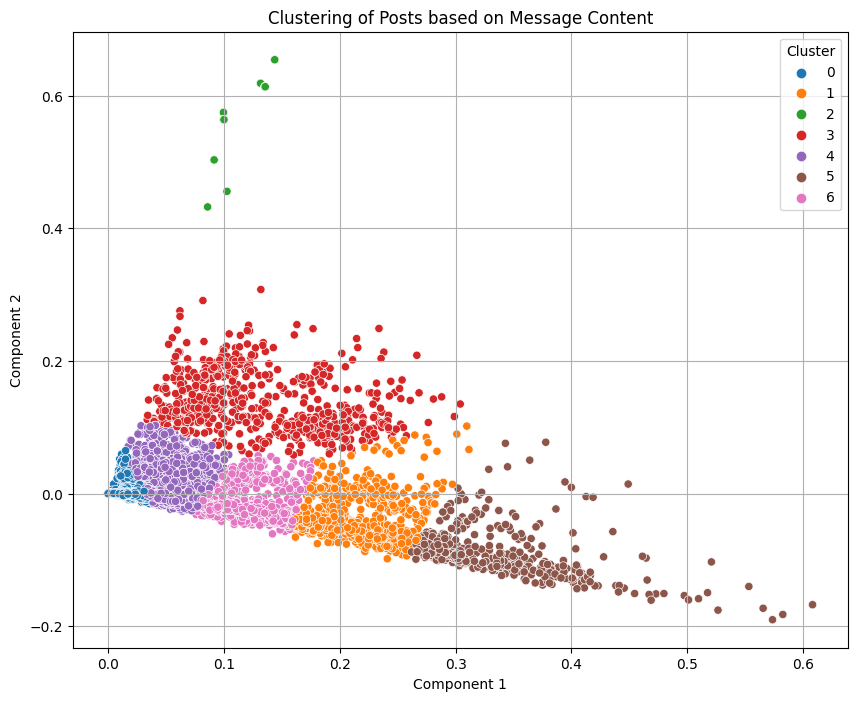

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('fb_news_posts_20K.csv')

# Define a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Create a K-means clustering pipeline
pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('svd', TruncatedSVD(n_components=2)),  # Reduce dimensionality for visualization
    ('kmeans', KMeans(n_clusters=7, random_state=42))  # 7 clusters
])

# Fit the pipeline to the text data
pipeline.fit(df['message'].fillna(''))

# Get cluster labels
cluster_labels = pipeline.named_steps['kmeans'].labels_
df['cluster'] = cluster_labels

# Display a sample of texts from each cluster
for cluster_id in range(7):  # Assuming 7 clusters
    print(f"\nCluster {cluster_id} Texts:")
    cluster_texts = df[df['cluster'] == cluster_id]['message'].sample(n=5, random_state=42)  # Displaying 5 sample texts from each cluster
    for idx, text in enumerate(cluster_texts, start=1):
        print(f"{idx}. {text}")
# Plot the clusters in 2D space
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pipeline.named_steps['svd'].transform(pipeline.named_steps['tfidf'].transform(df['message'].fillna('')))[:, 0], 
                y=pipeline.named_steps['svd'].transform(pipeline.named_steps['tfidf'].transform(df['message'].fillna('')))[:, 1], 
                hue=cluster_labels, palette='tab10', legend='full')
plt.title('Clustering of Posts based on Message Content')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('fb_news_posts_20K.csv')

# Define a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Create a K-means clustering pipeline
pipeline = Pipeline([
    ('tfidf', vectorizer),
    ('svd', TruncatedSVD(n_components=2)),  # Reduce dimensionality for visualization
    ('kmeans', KMeans(n_clusters=7, random_state=42))  # 7 clusters
])

# Fit the pipeline to the text data
pipeline.fit(df['message'].fillna(''))

# Get cluster labels
cluster_labels = pipeline.named_steps['kmeans'].labels_

# Transform the TF-IDF vectors
tfidf_vectors = pipeline.named_steps['tfidf'].transform(df['message'].fillna(''))

# Transform the TF-IDF vectors using TruncatedSVD
tfidf_vectors_svd = pipeline.named_steps['svd'].transform(tfidf_vectors)

# Plot the clusters in 2D space with labels
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=tfidf_vectors_svd[:, 0], y=tfidf_vectors_svd[:, 1], hue=cluster_labels, palette='tab10', legend='full')
plt.title('Clustering of Posts based on Message Content')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster')

# Add labels for each point
for i, txt in enumerate(df['message'].fillna('')):
    scatter.text(tfidf_vectors_svd[i, 0], tfidf_vectors_svd[i, 1], txt[:50], fontsize=8)  # Display only the first 50 characters

plt.grid(True)
plt.show()


c:\Users\JUMBO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
) missing from current font.\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\JUMBO\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128584 (\N{SEE-NO-EVIL MONKEY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\JUMBO\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\JUMBO\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\co

ValueError: 
New RNC $$
        ^
ParseException: Expected end of text, found '$'  (at char 8), (line:1, col:9)

<Figure size 1000x800 with 1 Axes>

In [8]:
df

,created_time,description,link,message,page_id,post_id,react_angry,react_haha,react_like,react_love,react_sad,react_wow,scrape_time,shares
0,2017-07-14T14:30:59+0000,NaN,https://www.facebook.com/bbcnews/videos/101548...,We are #LIVE outside the National Rifle Associ...,228735667216,228735667216_10154890879532217,54,24,993,144,12,24,2017-07-14 11:01:24.379857,139
1,2017-07-14T14:20:59+0000,,http://bbc.in/2talMsx,UPDATE: \r\n-2 Ukrainian tourists killed in st...,228735667216,228735667216_10154890968202217,172,8,994,11,783,264,2017-07-14 11:01:24.379857,680
2,2017-07-14T13:40:38+0000,NaN,https://www.facebook.com/bbcnews/videos/101548...,Proms: Come with us on a tour of the Royal Alb...,228735667216,228735667216_10154890852247217,5,12,2034,369,6,45,2017-07-14 11:01:24.379857,395
3,2017-07-14T12:55:45+0000,NaN,https://www.facebook.com/bbcnews/videos/142678...,Thousands say their final goodbyes to Bradley ...,228735667216,228735667216_1426789250735491,6,0,2262,754,1989,11,2017-07-14 11:01:24.379857,542
4,2017-07-14T12:45:00+0000,NaN,https://www.facebook.com/bbcnews/videos/101548...,"Despite safety warnings, this beach near an ai...",228735667216,228735667216_10154890645702217,65,513,4336,54,128,815,2017-07-14 11:01:24.379857,1956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19845,2017-07-07T23:30:00+0000,NaN,https://www.facebook.com/miamiherald/videos/10...,Surveillance footage released by the Palm Beac...,38925837299,38925837299_10155557438782300,3,2,91,2,19,29,2017-07-14 12:57:40.584587,145
19846,2017-07-07T23:00:00+0000,Jungle Island’s new owners want to build a hot...,http://www.miamiherald.com/news/business/artic...,They’ll need Miami voters to approve the plans...,38925837299,38925837299_10155557374762300,4,0,31,1,0,1,2017-07-14 12:57:40.584587,6
19847,2017-07-07T22:30:00+0000,A woman accused of using pepper spray to escap...,http://www.miamiherald.com/news/local/crime/ar...,Police say the woman first struck at the Macy’...,38925837299,38925837299_10155557342647300,3,2,22,0,1,2,2017-07-14 12:57:40.584587,4
19848,2017-07-07T22:00:00+0000,The government’s offer — an attempt to resolve...,http://www.miamiherald.com/news/nation-world/w...,The government’s offer is limited to those sta...,38925837299,38925837299_10155557288502300,0,1,12,0,3,4,2017-07-14 12:57:40.584587,3


<Figure size 1200x600 with 0 Axes>

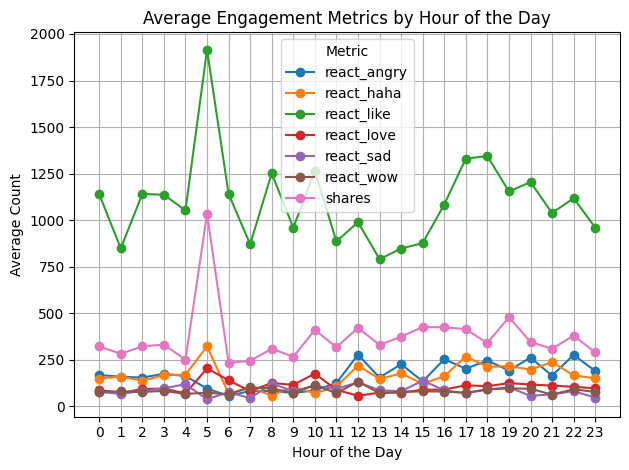

<Figure size 1200x600 with 0 Axes>

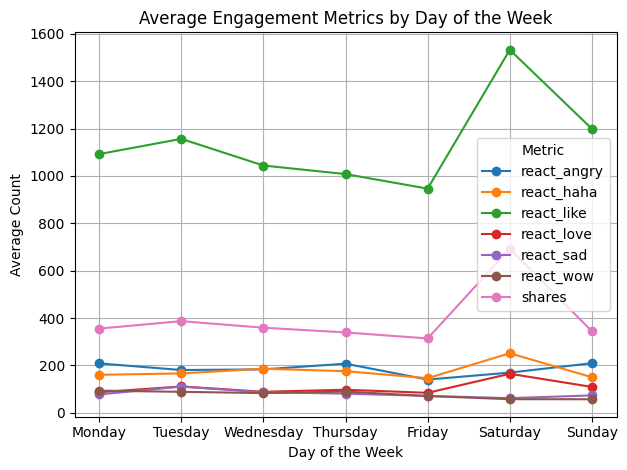

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file into a DataFrame
df = pd.read_csv('fb_news_posts_20K.csv')

# Convert 'created_time' to datetime format
df['created_time'] = pd.to_datetime(df['created_time'])

# Extract hour of the day and day of the week
df['hour_of_day'] = df['created_time'].dt.hour
df['day_of_week'] = df['created_time'].dt.dayofweek  # Monday=0, Sunday=6

# Group by hour of the day and calculate average engagement metrics
hourly_engagement = df.groupby('hour_of_day')[['react_angry', 'react_haha', 'react_like', 'react_love', 'react_sad', 'react_wow', 'shares']].mean()

# Group by day of the week and calculate average engagement metrics
daily_engagement = df.groupby('day_of_week')[['react_angry', 'react_haha', 'react_like', 'react_love', 'react_sad', 'react_wow', 'shares']].mean()

# Plot comparison of engagement metrics by hour of the day
plt.figure(figsize=(12, 6))
hourly_engagement.plot(kind='line', marker='o')
plt.title('Average Engagement Metrics by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.xticks(range(24))
plt.grid(True)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# Plot comparison of engagement metrics by day of the week
plt.figure(figsize=(12, 6))
daily_engagement.plot(kind='line', marker='o')
plt.title('Average Engagement Metrics by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Count')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


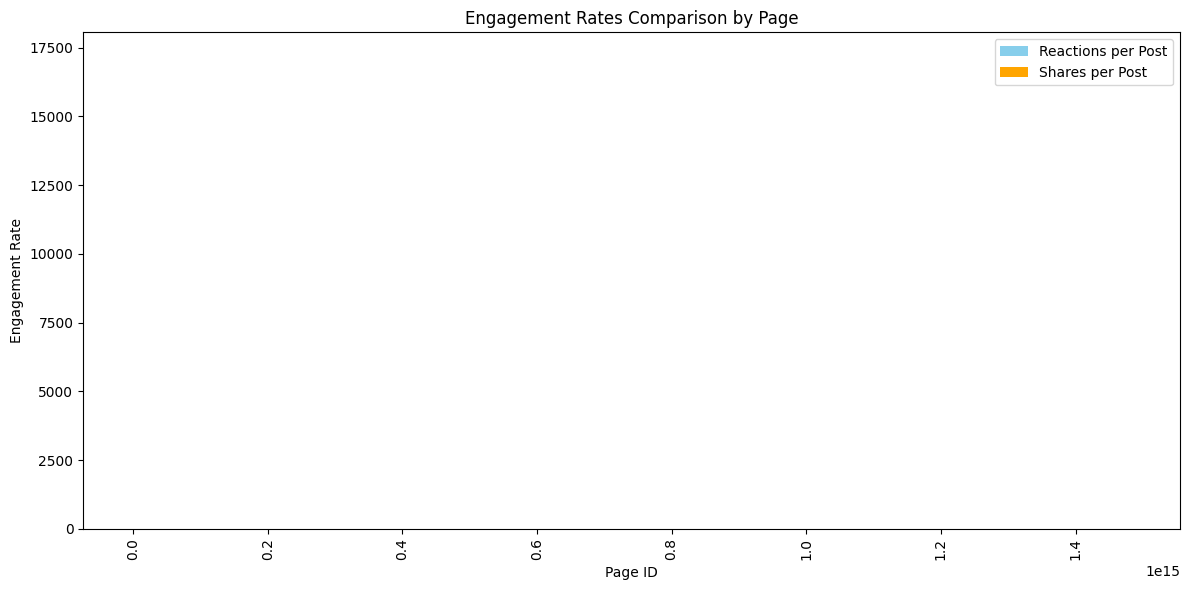

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('fb_news_posts_20K.csv')

# Group by page_id and calculate total reactions, shares, and number of posts for each page
page_engagement = df.groupby('page_id').agg({
    'react_angry': 'sum',
    'react_haha': 'sum',
    'react_like': 'sum',
    'react_love': 'sum',
    'react_sad': 'sum',
    'react_wow': 'sum',
    'shares': 'sum',
    'post_id': 'count'
}).reset_index()

# Calculate total reactions per post for each page
page_engagement['total_reactions'] = (page_engagement['react_angry'] + page_engagement['react_haha'] +
                                      page_engagement['react_like'] + page_engagement['react_love'] +
                                      page_engagement['react_sad'] + page_engagement['react_wow'])

# Calculate engagement rates (reactions and shares per post) for each page
page_engagement['reactions_per_post'] = page_engagement['total_reactions'] / page_engagement['post_id']
page_engagement['shares_per_post'] = page_engagement['shares'] / page_engagement['post_id']

# Sort pages based on reactions per post
page_engagement_sorted = page_engagement.sort_values(by='reactions_per_post', ascending=False)

# Plot comparison of engagement rates among different pages
plt.figure(figsize=(12, 6))
plt.bar(page_engagement_sorted['page_id'], page_engagement_sorted['reactions_per_post'], color='skyblue', label='Reactions per Post')
plt.bar(page_engagement_sorted['page_id'], page_engagement_sorted['shares_per_post'], color='orange', label='Shares per Post')
plt.title('Engagement Rates Comparison by Page')
plt.xlabel('Page ID')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


PROPORTIONAL AND INVERSLY PROPORTIONAL COLUMNS 

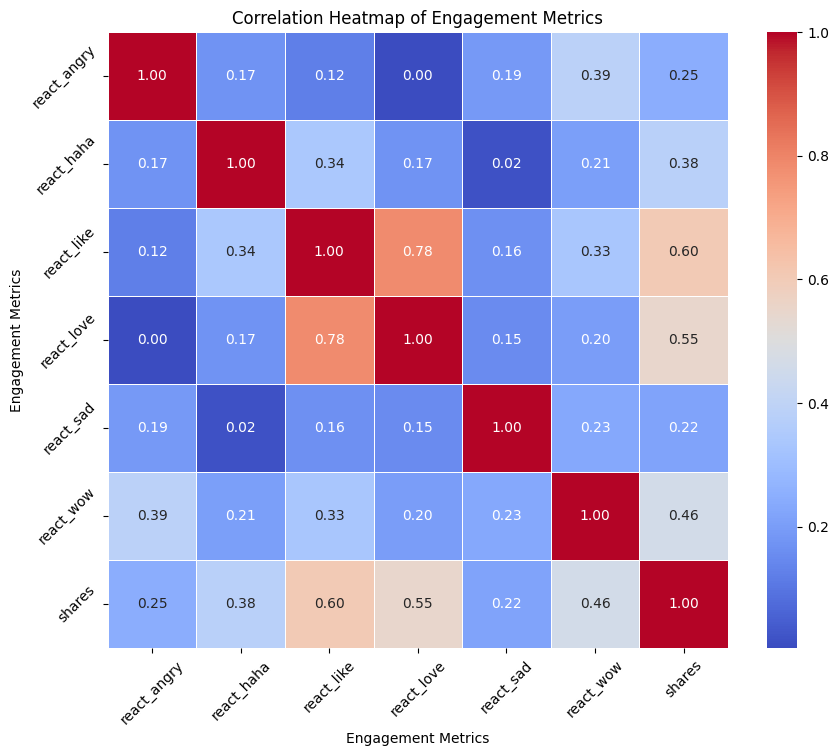

In [13]:
engagement_columns = ['react_angry', 'react_haha', 'react_like', 'react_love', 'react_sad', 'react_wow', 'shares']

# Compute correlation matrix
correlation_matrix = df[engagement_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Engagement Metrics')
plt.xlabel('Engagement Metrics')
plt.ylabel('Engagement Metrics')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

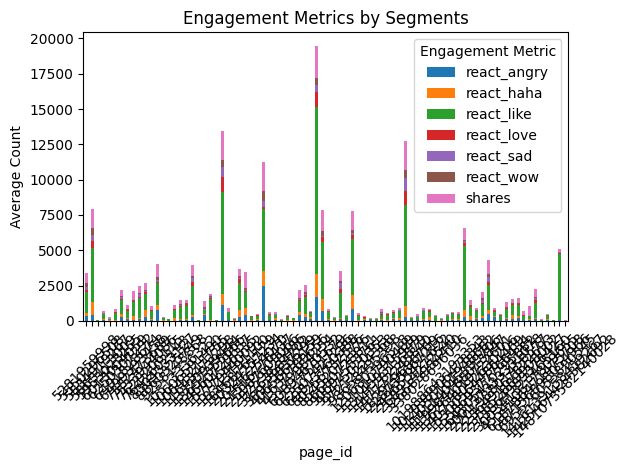

In [14]:
segment_variable = 'page_id'

# Group by the categorical variable and calculate average engagement metrics for each segment
segmented_engagement = df.groupby(segment_variable)[['react_angry', 'react_haha', 'react_like', 'react_love', 'react_sad', 'react_wow', 'shares']].mean()

# Plot engagement metrics within each segment
plt.figure(figsize=(12, 6))
segmented_engagement.plot(kind='bar', stacked=True)
plt.title('Engagement Metrics by Segments')
plt.xlabel(segment_variable)
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.legend(title='Engagement Metric')
plt.tight_layout()
plt.show()

In [17]:
df['total_reactions'] = df['react_angry'] + df['react_haha'] + df['react_like'] + df['react_love'] + df['react_sad'] + df['react_wow']

# Sort DataFrame by total reactions in descending order
df_sorted = df.sort_values(by='total_reactions', ascending=False)

# Display the top 5 posts with the most reactions
top_posts = df_sorted.head(10)

# Display the messages of the top posts
for idx, row in top_posts.iterrows():
    print(f"Post {idx + 1}: {row['message'], row['link']}\n")

Post 241: ("The moment President Donald J. Trump is left hanging after trying to shake hands with the Polish president's wife. \r\n\r\nMore on his keynote speech in Poland: bbc.in/2stMesr", 'https://www.facebook.com/bbcnews/videos/10154859051287217/')

Post 344: ('"What an honor it is to pray for the President in the Oval Office." \r\n\r\nPHOTO: An intimate moment during a meeting between President Donald J. Trump and evangelical leaders shows them laying their hands on Trump\'s shoulders as his head is bent in prayer. http://fxn.ws/2tg49m1', 'https://www.facebook.com/FoxNews/photos/a.184044921335.134777.15704546335/10155656548031336/?type=3')

Post 342: ('Musician Kid Rock has announced his bid for the U.S. Senate in Michigan.\r\n\r\nRepublicans in Michigan have reportedly been considering Rock to run on the GOP ticket in 2018 to challenge incumbent Democrat Debbie Stabenow for her seat. http://fxn.ws/2ujYTmt', 'https://www.facebook.com/FoxNews/photos/a.184044921335.134777.15704546335

CREATION-SCRAPED TIME

In [18]:
df['created_time'] = pd.to_datetime(df['created_time'])
df['scrape_time'] = pd.to_datetime(df['scrape_time'])

# Calculate the time difference between creation time and scraped time
df['time_difference'] = df['scrape_time'] - df['created_time']

# Sort the DataFrame based on the number of reactions and time difference in descending order
df_sorted = df.sort_values(by=['react_like', 'time_difference'], ascending=[False, True])

# Select the top posts with the highest number of reactions and shortest time difference
top_posts_viral = df_sorted.head(10)

# Display the relevant columns (post_id, message, link, and time difference) for the top viral posts
relevant_columns = ['post_id', 'message', 'link', 'time_difference']
relevant_posts_viral = top_posts_viral[relevant_columns]

# Display the relevant viral posts in a tabular format
print(relevant_posts_viral)

TypeError: Cannot subtract tz-naive and tz-aware datetime-like objects.

HATED


In [24]:
df['created_time'] = pd.to_datetime(df['created_time'])
df['scrape_time'] = pd.to_datetime(df['scrape_time'])

# Convert both columns to timezone naive datetime objects
df['created_time'] = df['created_time'].dt.tz_localize(None)
df['scrape_time'] = df['scrape_time'].dt.tz_localize(None)

# Calculate the time difference between creation time and scraped time
df['time_difference'] = df['scrape_time'] - df['created_time']

# Sort the DataFrame based on the number of reactions and time difference in descending order
df_sorted = df.sort_values(by=['react_like','react_angry', 'time_difference'], ascending=[True,False, True])

# Select the top posts with the highest number of reactions and shortest time difference
top_posts_viral = df_sorted.head(10)

# Display the relevant columns (post_id, message, link, and time difference) for the top viral posts
relevant_columns = ['post_id', 'message', 'link', 'time_difference']
relevant_posts_viral = top_posts_viral[relevant_columns]

# Display the relevant viral posts in a tabular format
relevant_posts_viral

,post_id,message,link,time_difference
7425,5953023255_10155545515353256,"Students, parents and teachers could have a ro...",http://www.chicagotribune.com/news/local/polit...,0 days 15:35:57.608397
8151,1416139158459267_1571373819602466,SENATE HEALTH BILL KEEPS OBAMACARE TAX...,http://dlvr.it/PVZSh0,-1 days +20:26:21.328024
19671,38925837299_10155574282177300,Police say the suspect tried to run over a wom...,http://www.miamiherald.com/news/local/communit...,1 days 14:17:14.348587
9668,687156898054966_1204074243029893,How would you respond?,http://ijr.com/the-declaration/2017/07/914562-...,5 days 15:15:33.458545
8348,1416139158459267_1566390543434127,MORE delays!,http://dlvr.it/PTb8yD,3 days 18:26:52.835139
8650,147772245840_10154656792560841,Dude. Get a grip.,https://www.youngcons.com/bernie-sanders-urges...,-1 days +20:00:25.440558
8900,182919686769_10154659292311770,Jared Kushner and Ivanka Trump consistently do...,http://trib.al/AOrF0NR,-1 days +20:00:35.114293
6904,1481073582140028_1967909463456435,President Muhammadu Buhari has taken repeated ...,https://bloom.bg/2tTNMgX,-1 days +21:24:26.033591
6911,1481073582140028_1967814953465886,The second former leader to face jail amid the...,https://bloom.bg/2tSVxnr,0 days 01:03:18.033591
6927,1481073582140028_1967577430156305,She's hinted she may leave when the term ends....,https://bloom.bg/2ukh1vA,0 days 11:33:27.395617


LIKED

In [25]:
df['created_time'] = pd.to_datetime(df['created_time'])
df['scrape_time'] = pd.to_datetime(df['scrape_time'])

# Convert both columns to timezone naive datetime objects
df['created_time'] = df['created_time'].dt.tz_localize(None)
df['scrape_time'] = df['scrape_time'].dt.tz_localize(None)

# Calculate the time difference between creation time and scraped time
df['time_difference'] = df['scrape_time'] - df['created_time']

# Sort the DataFrame based on the number of reactions and time difference in descending order
df_sorted = df.sort_values(by=['react_like','react_angry', 'time_difference'], ascending=[False,False, True])

# Select the top posts with the highest number of reactions and shortest time difference
top_posts_viral = df_sorted.head(10)

# Display the relevant columns (post_id, message, link, and time difference) for the top viral posts
relevant_columns = ['post_id', 'message', 'link', 'time_difference']
relevant_posts_viral = top_posts_viral[relevant_columns]

# Display the relevant viral posts in a tabular format
relevant_posts_viral

,post_id,message,link,time_difference
16210,1425464424382692_1539609022968231,"Seven years ago yesterday (March 1st), I marri...",https://www.facebook.com/MegynKelly/photos/a.1...,864 days 11:34:40.312999
343,15704546335_10155656548031336,"""What an honor it is to pray for the President...",https://www.facebook.com/FoxNews/photos/a.1840...,1 days 13:22:36.160233
341,15704546335_10155656751086336,Musician Kid Rock has announced his bid for th...,https://www.facebook.com/FoxNews/photos/a.1840...,1 days 12:19:00.160233
17814,62507427296_10154783827827297,"""I think this is a teachable moment, not just ...",https://www.facebook.com/Maher/videos/10154783...,34 days 07:06:23.038109
142,228735667216_10154875262277217,You'll never guess when this photo was taken.....,https://www.facebook.com/bbcnews/videos/101548...,3 days 19:41:34.592177
491,15704546335_10155640699266336,"Viral Video Alert! Last night, before boarding...",https://www.facebook.com/FoxNews/videos/101556...,4 days 19:37:11.373654
199,228735667216_10154866313777217,'You could ask my dad Stephen Hawking any ques...,https://www.facebook.com/bbcnews/videos/101548...,6 days 02:40:57.097128
240,228735667216_10154859051287217,The moment President Donald J. Trump is left h...,https://www.facebook.com/bbcnews/videos/101548...,7 days 18:00:06.076125
157,228735667216_1412464658837743,A disabled fan got the most incredible Coldpla...,https://www.facebook.com/bbcnews/videos/141246...,4 days 04:37:19.415160
393,15704546335_10155651544106336,"A military supporter played ""Taps"" Tuesday aft...",https://www.facebook.com/FoxNews/videos/101556...,2 days 15:14:28.081325


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read the CSV file into a DataFrame
df = pd.read_csv('fb_news_posts_20K.csv')

# Select relevant features and target variable
X = df[['react_angry', 'react_haha', 'react_like', 'react_love', 'react_sad', 'react_wow']]  # Features (e.g., reactions)
# Calculate total number of reactions as the target variable (engagement metric)
y = X.sum(axis=1)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_linear = linear_model.predict(X_test)

# Evaluate linear regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression Mean Squared Error:", mse_linear)


Linear Regression Mean Squared Error: 4.823806201840176e-23


In [27]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso

# Initialize and train Random Forest Regression model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate Random Forest Regression model
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
print("Random Forest Regression Mean Squared Error:", mse_random_forest)

# Initialize and train Gradient Boosting Regression model
gradient_boosting_model = GradientBoostingRegressor()
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

# Evaluate Gradient Boosting Regression model
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
print("Gradient Boosting Regression Mean Squared Error:", mse_gradient_boosting)

# Initialize and train Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge Regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression Mean Squared Error:", mse_ridge)

# Initialize and train Lasso Regression model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Lasso Regression model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression Mean Squared Error:", mse_lasso)


Random Forest Regression Mean Squared Error: 596012.8706160705
Gradient Boosting Regression Mean Squared Error: 336916.1036886329
Ridge Regression Mean Squared Error: 1.0678233055749774e-13
Lasso Regression Mean Squared Error: 0.0072616223438031246


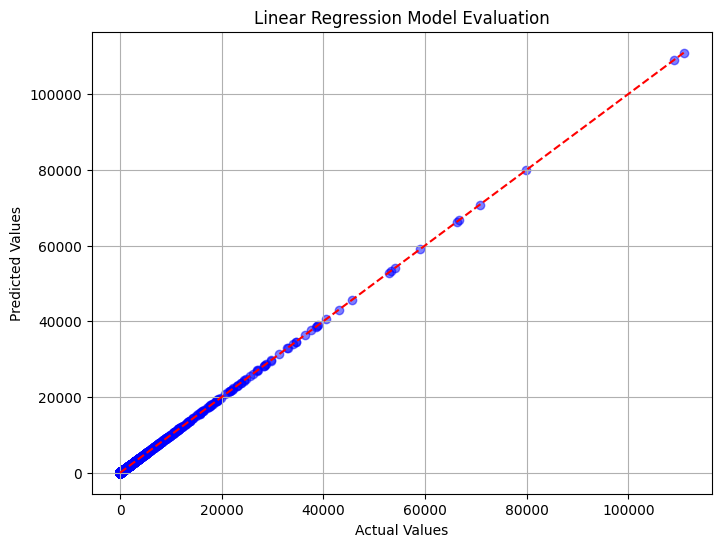

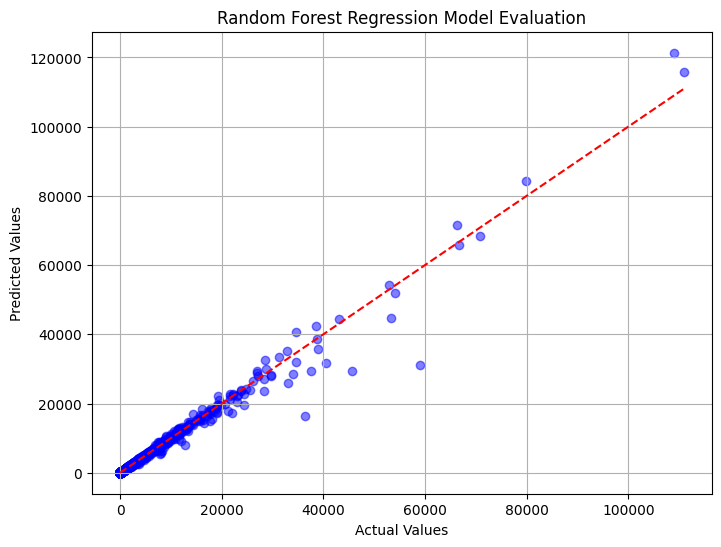

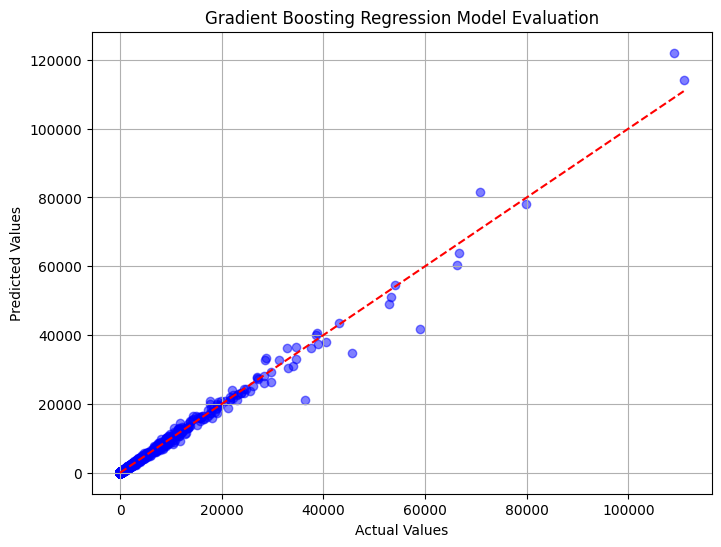

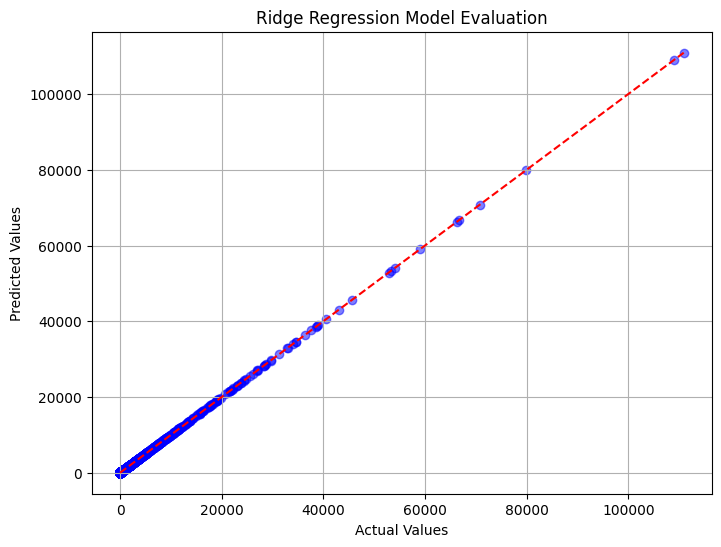

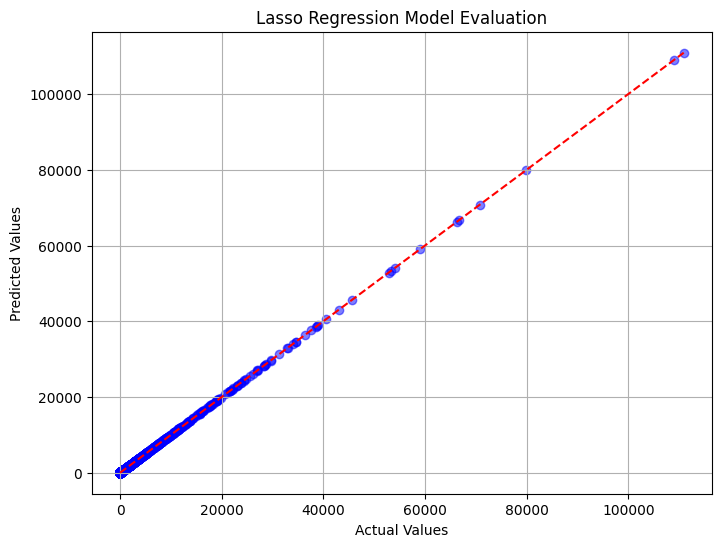

In [28]:
import matplotlib.pyplot as plt

# Plotting function for model evaluation
def plot_model_evaluation(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.title(f'{model_name} Model Evaluation')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

# Plot evaluation for Linear Regression
plot_model_evaluation(y_test, y_pred_linear, 'Linear Regression')

# Plot evaluation for Random Forest Regression
plot_model_evaluation(y_test, y_pred_random_forest, 'Random Forest Regression')

# Plot evaluation for Gradient Boosting Regression
plot_model_evaluation(y_test, y_pred_gradient_boosting, 'Gradient Boosting Regression')

# Plot evaluation for Ridge Regression
plot_model_evaluation(y_test, y_pred_ridge, 'Ridge Regression')

# Plot evaluation for Lasso Regression
plot_model_evaluation(y_test, y_pred_lasso, 'Lasso Regression')



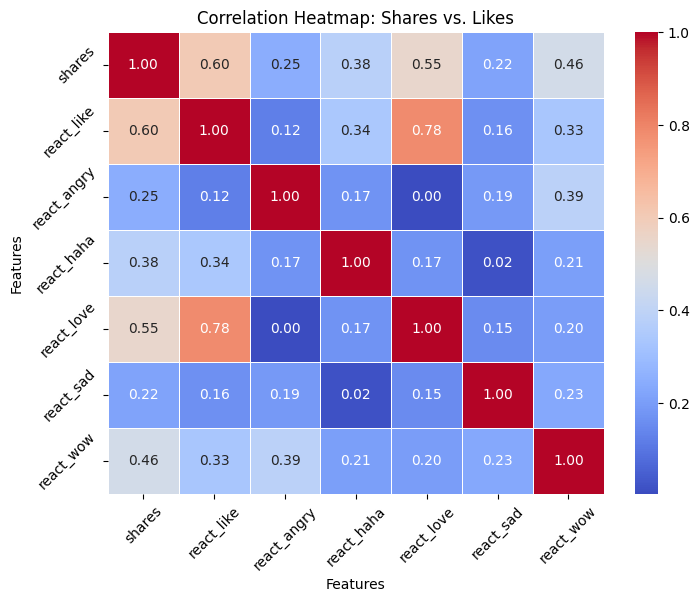

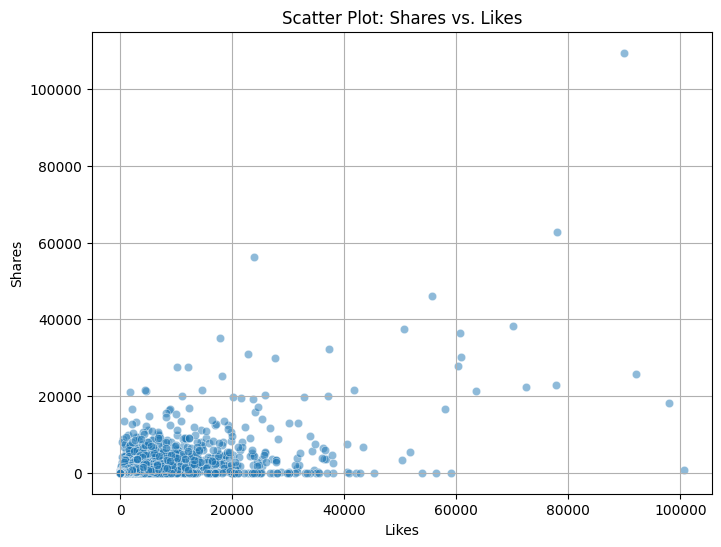

In [30]:
selected_columns = ['shares', 'react_like','react_angry', 'react_haha', 'react_love', 'react_sad', 'react_wow']  # You can add more columns for analysis if needed

# Create a subset of the DataFrame with selected columns
subset_df = df[selected_columns]

# Calculate correlation matrix
correlation_matrix = subset_df.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap: Shares vs. Likes')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Visualize relationship between 'shares' and 'react_like' using scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='react_like', y='shares', alpha=0.5)
plt.title('Scatter Plot: Shares vs. Likes')
plt.xlabel('Likes')
plt.ylabel('Shares')
plt.grid(True)
plt.show()


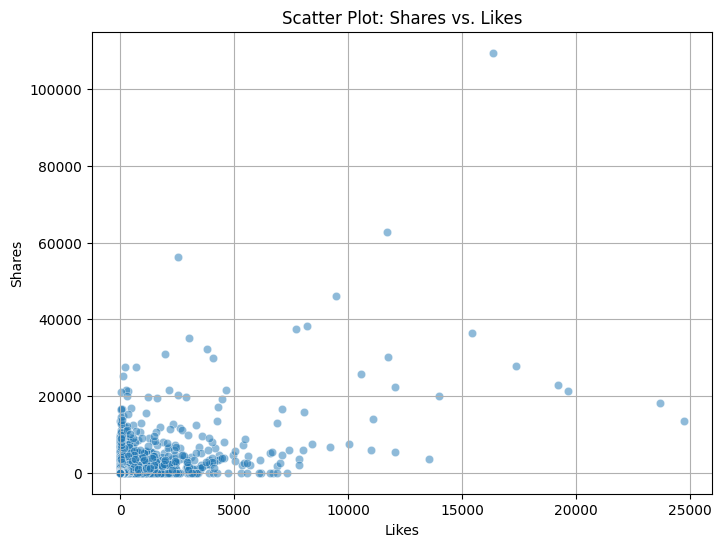

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='react_love', y='shares', alpha=0.5)
plt.title('Scatter Plot: Shares vs. Likes')
plt.xlabel('Likes')
plt.ylabel('Shares')
plt.grid(True)
plt.show()

In [49]:

df1= pd.read_csv('dataset_Facebook.csv',delimiter=';')
df1.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


C:\Users\JUMBO\AppData\Local\Temp\ipykernel_38052\4103038931.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


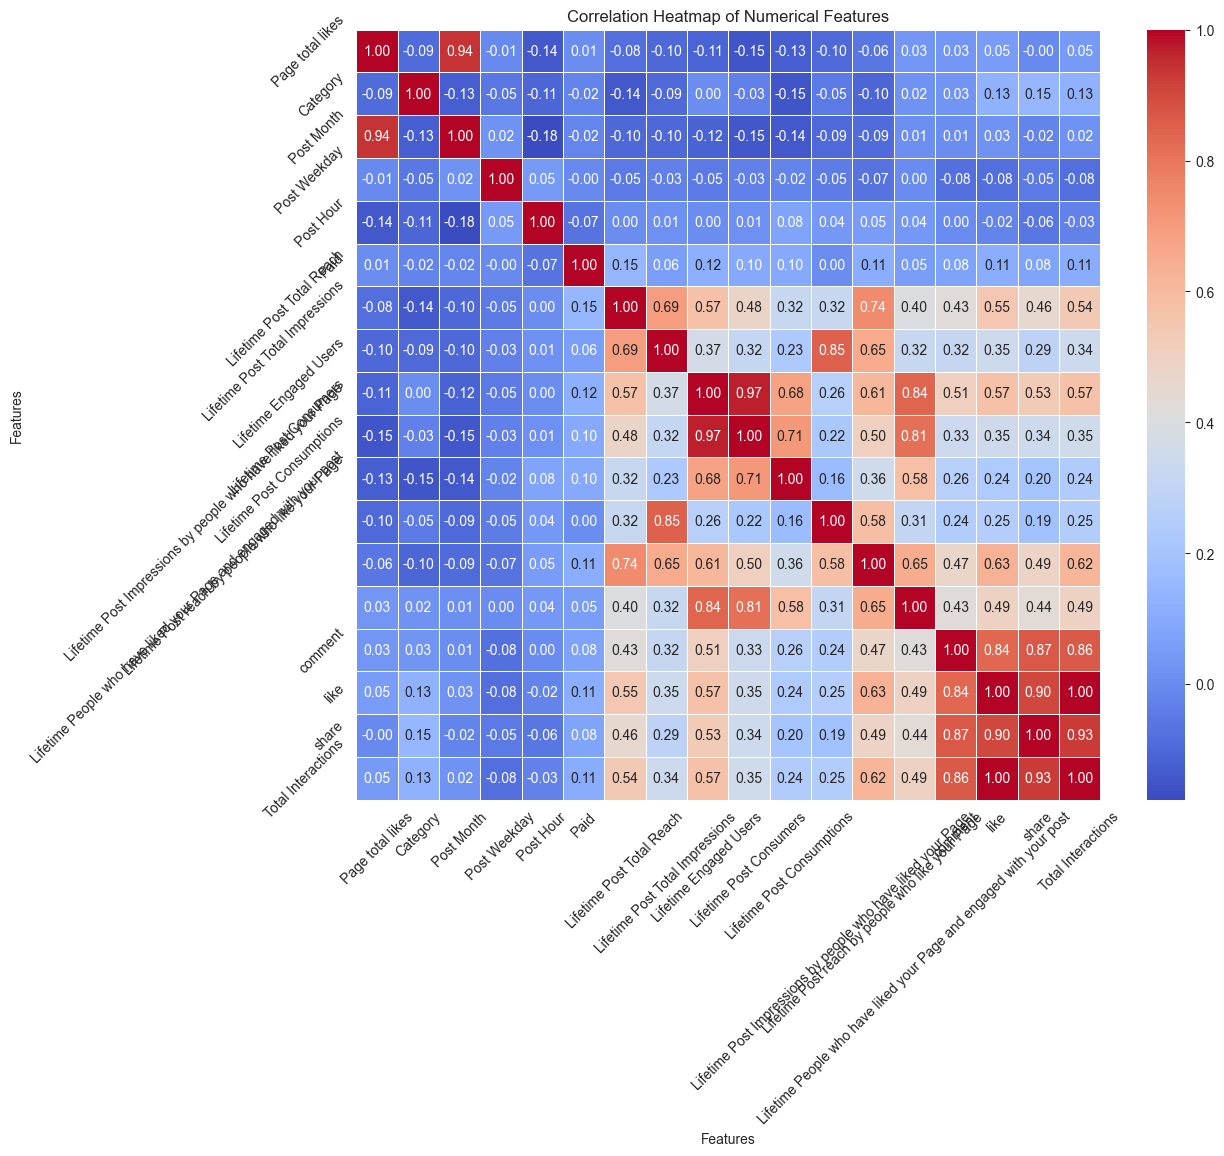

In [50]:
correlation_matrix = df1.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [51]:
# Identify most likely related features
related_features = correlation_matrix.unstack().sort_values(ascending=False)
print("Most likely related features:")
print(related_features[(related_features != 1) & (related_features > 0.7)])

# Identify most likely unrelated features
unrelated_features = correlation_matrix.unstack().sort_values(ascending=True)
print("\nMost likely unrelated features:")
print(unrelated_features[unrelated_features.abs() < 0.1].head(10))

Most likely related features:
like                                                                 Total Interactions                                                     0.997705
Total Interactions                                                   like                                                                   0.997705
Lifetime Engaged Users                                               Lifetime Post Consumers                                                0.968213
Lifetime Post Consumers                                              Lifetime Engaged Users                                                 0.968213
Page total likes                                                     Post Month                                                             0.941192
Post Month                                                           Page total likes                                                       0.941192
Total Interactions                                                   share  

Descriptive Statistics for Paid Posts:
count       139.000000
mean      37362.942446
std       63088.159944
min        1568.000000
25%        6489.500000
50%       12060.000000
75%       41363.000000
max      497910.000000
Name: Lifetime Post Total Impressions, dtype: float64

Descriptive Statistics for Organic Posts:
count    3.600000e+02
mean     2.664509e+04
std      8.145948e+04
min      5.700000e+02
25%      5.394000e+03
50%      8.443000e+03
75%      1.793625e+04
max      1.110282e+06
Name: Lifetime Post Total Impressions, dtype: float64


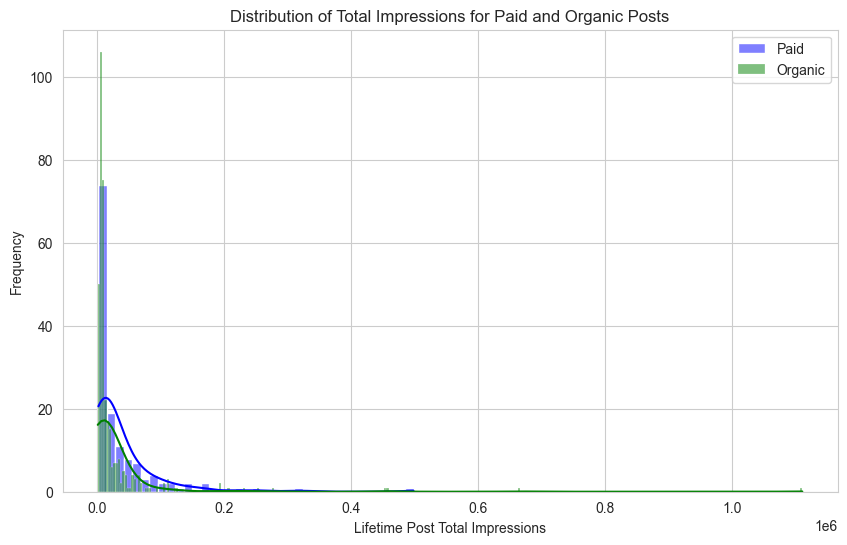

In [42]:
paid_posts = df1[df1['Paid'] == 1]
organic_posts = df1[df1['Paid'] == 0]

# Descriptive statistics
paid_stats = paid_posts['Lifetime Post Total Impressions'].describe()
organic_stats = organic_posts['Lifetime Post Total Impressions'].describe()

print("Descriptive Statistics for Paid Posts:")
print(paid_stats)
print("\nDescriptive Statistics for Organic Posts:")
print(organic_stats)

# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data=paid_posts, x='Lifetime Post Total Impressions', color='blue', label='Paid', kde=True)
sns.histplot(data=organic_posts, x='Lifetime Post Total Impressions', color='green', label='Organic', kde=True)
plt.title('Distribution of Total Impressions for Paid and Organic Posts')
plt.xlabel('Lifetime Post Total Impressions')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
most_active_posts = df1.nlargest(10, 'Total Interactions')  # Adjust '10' to the desired number of top posts

# Display the most active posts and their characteristics
print("Top 10 Most Active Posts:")
most_active_posts


Top 10 Most Active Posts:


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
244,130791,Photo,2,7,3,5,1.0,180480,319133,8072,4010,6242,108752,51456,3316,372,5172.0,790.0,6334
379,111620,Photo,3,4,1,14,1.0,105632,147918,3984,2254,3391,48575,27328,1936,51,1998.0,128.0,2177
168,135428,Photo,1,9,3,10,0.0,41984,68290,3370,2420,4074,34802,20928,2126,144,1622.0,208.0,1974
460,92507,Photo,3,2,1,13,0.0,55520,665792,4544,3586,6624,648611,47488,3430,146,1546.0,181.0,1873
349,117764,Photo,3,5,5,13,0.0,81856,124753,3000,1637,2718,52477,27392,1756,45,1639.0,122.0,1806
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
101,137020,Photo,2,10,4,3,0.0,68896,104952,2624,1326,1952,35707,19840,1354,26,1505.0,95.0,1626
323,123047,Photo,3,6,1,10,0.0,56672,104966,2579,1334,1850,78678,37408,1831,20,1372.0,47.0,1439
199,132817,Photo,3,8,4,10,0.0,33536,64850,1954,1016,1678,50076,24448,1564,33,1155.0,102.0,1290
176,135195,Photo,3,9,6,3,1.0,22304,37159,1805,984,1618,22864,13304,1349,29,1047.0,98.0,1174


In [46]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read Dataset 1 into DataFrame
df1 = pd.read_csv('fb_news_posts_20k.csv')

# Construct graph
G1 = nx.Graph()

# Add nodes for posts
for index, row in df1.iterrows():
    G1.add_node(row['post_id'], type='post', message=row['message'])

# Add edges representing interactions between posts and pages
for index, row in df1.iterrows():
    for reaction_type in ['react_like', 'react_angry', 'react_haha', 'react_love', 'react_sad', 'react_wow']:
        if row[reaction_type] > 0:
            G1.add_edge(row['post_id'], row['page_id'], reaction=reaction_type, count=row[reaction_type])

# Visualization
plt.figure(figsize=(10, 8))
pos1 = nx.spring_layout(G1, seed=42)  # Define layout for the graph
nx.draw_networkx(G1, pos1, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_weight='bold')
plt.title('Social Media Graph Network Analysis - Dataset 1')
plt.axis('off')  # Turn off axis
plt.show()


KeyboardInterrupt: 

<Figure size 1000x800 with 0 Axes>